In [2]:
import pandas as pd
pd.set_option('display.max_row', 500)
pd.set_option('display.max_columns', 100)
import numpy as np
import sys
np.set_printoptions(threshold=sys.maxsize)
#np.set_printoptions(threshold=sys.maxsize)

from konlpy.tag import Okt # 옛날 Twitter 클래스
okt = Okt()
import pickle
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt

In [3]:
import re

## Word2vector 

### 1) word2vector 모델 만들기

In [4]:
import gensim
from gensim.models import Word2Vec

In [5]:
# word = movie 
m_word =  pd.read_csv('movie_fin.csv',index_col=False)
m_word = m_word[['movie_id','word']]
m_word = m_word.drop_duplicates(['movie_id'],keep = 'first') 
tokenized_reviews = m_word['word']

In [6]:
sentences = []
for word in tokenized_reviews:
    sentence = re.sub('[^가-힣\s]*[\n]*', '',str(word)).split(" ")
    sentences.append(sentence)

In [7]:
#embedding_model = Word2Vec(sentences, vector_size=100, window = 4, min_count=20, workers=4, sg=1)

## 워드투벡 모델(word2VecModel.model)

In [8]:
#모델 저장
#embedding_model.save('word2VecModel.model')

In [7]:
from gensim.models import Word2Vec
embedding_model = Word2Vec.load('word2VecModel.model')

In [8]:
model_result = embedding_model.wv.most_similar("행복")
print(model_result)

[('희망이', 0.7067025899887085), ('직할', 0.6829116940498352), ('행복감', 0.6770287752151489), ('행복하다', 0.6634958386421204), ('기쁨', 0.6571207046508789), ('평온', 0.6550794243812561), ('귀중하다', 0.654574990272522), ('무료함', 0.6516629457473755), ('참되다', 0.6458353400230408), ('여생', 0.6454914212226868)]


## 2) 추천시스템 구현

In [9]:
embedding_model = gensim.models.Word2Vec.load('word2VecModel.model')

In [69]:
keyword = input("키워드 입력 : ") #로맨틱 #아련한
keyword = okt.morphs(keyword, stem=True)
FirstKeyword = keyword[0]

# check embedding result
VecWords = embedding_model.wv.most_similar(positive=[FirstKeyword], topn=100)
Veclist1 = []
for i in range(0,31):
    Veclist1.append(VecWords[i][0])
Veclist1

키워드 입력 : 로맨틱 아련한


['로맨틱코미디',
 '로멘틱',
 '코미디',
 '로맨스',
 '코메디',
 '로코',
 '멜로영화',
 '노팅힐',
 '상큼',
 '러블리',
 '알콩달콩',
 '로맨스영화',
 '멜로',
 '왁자지껄하다',
 '코믹',
 '장물',
 '청춘영화',
 '연하남',
 '연애담',
 '영화장르',
 '액츄얼리',
 '달달',
 '유쾌',
 '형사물',
 '학원물',
 '키스신',
 '딴판',
 '저스트',
 '끈적끈적하다',
 '멜로드라마',
 '더시티']

In [70]:
keyword = input("키워드 입력 : ") #여운 / 잘생기다
keyword = okt.morphs(keyword, stem=True)
SecondKeyword = keyword[0]

# check embedding result
VecWords2 = embedding_model.wv.most_similar(positive=[SecondKeyword], topn=100)
Veclist2 = []
for i in range(0,31):
    Veclist2.append(VecWords2[i][0])
Veclist2

키워드 입력 : 여운 잘생기다


['괜시리',
 '뒤끝',
 '뒷맛',
 '울림',
 '개운하다',
 '숙연',
 '러브액츄얼리',
 '가슴속',
 '뇌리',
 '찝찝하다',
 '아쉬움',
 '촉촉하다',
 '잔잔하다',
 '아리다',
 '사하나',
 '농도',
 '마음속',
 '벅차오르다',
 '애뜻',
 '되새김질',
 '제겐',
 '감명',
 '뭉클하다',
 '후벼파다',
 '가선',
 '포만',
 '시리',
 '두고두고',
 '머릿',
 '엔딩',
 '피로하다']

In [71]:
keyword = input("키워드 입력 : ") #매력 / 울림
keyword = okt.morphs(keyword, stem=True)
ThirdKeyword = keyword[0]

# check embedding result
VecWords3 = embedding_model.wv.most_similar(positive=[ThirdKeyword], topn=100)
Veclist3 = []
for i in range(0,31):
    Veclist3.append(VecWords3[i][0])
Veclist3

키워드 입력 : 매력 울림


['러블리',
 '개성',
 '마력',
 '존예',
 '뿜뿜',
 '생기발랄하다',
 '완숙',
 '백치',
 '섹시하다',
 '어우르다',
 '안성맞춤',
 '나쁜남자',
 '상큼',
 '임펙트',
 '주얼',
 '잔재미',
 '똘끼',
 '잘빠지다',
 '중성',
 '기품',
 '배우진',
 '미하',
 '특이점',
 '섹슈얼',
 '수수하다',
 '감미',
 '강지환',
 '성미',
 '주드로',
 '이나영',
 '톡톡']

In [72]:
myVec = ([FirstKeyword]+Veclist1[:10])*2 + ([SecondKeyword]+Veclist2[:5])*2 + [ThirdKeyword] + Veclist3[:5]
myVec2 = [FirstKeyword]*3+Veclist1+[SecondKeyword]*2+Veclist2[:5]+[ThirdKeyword] + Veclist3[:5]
#len(myVec2)

## Movie_Dict 를 데이터 프레임으로 만들기 

In [73]:
with open('movie_dict.pickle', 'rb') as f:
     movie_dict = pickle.load(f)
#movie = pd.DataFrame(list(movie_dict.items()),columns = ['movie_id','review'])

In [74]:
review_df= pd.DataFrame(list(movie_dict.items()),
                   columns=['movie_id', 'review'])

## vector 합치기

In [76]:
mysent=""
for i in myVec2:
    mysent += "".join(i)
    mysent += " "
mysent

'로맨틱 로맨틱 로맨틱 로맨틱코미디 로멘틱 코미디 로맨스 코메디 로코 멜로영화 노팅힐 상큼 러블리 알콩달콩 로맨스영화 멜로 왁자지껄하다 코믹 장물 청춘영화 연하남 연애담 영화장르 액츄얼리 달달 유쾌 형사물 학원물 키스신 딴판 저스트 끈적끈적하다 멜로드라마 더시티 여운 여운 괜시리 뒤끝 뒷맛 울림 개운하다 매력 러블리 개성 마력 존예 뿜뿜 '

In [77]:
mydf = pd.Series(['입력',mysent], index=["movie_id","review"])
mymyCut = review_df.append(mydf, ignore_index=True)
mymyCut.iloc[-1,:]

movie_id                                                   입력
review      로맨틱 로맨틱 로맨틱 로맨틱코미디 로멘틱 코미디 로맨스 코메디 로코 멜로영화 노팅힐...
Name: 12038, dtype: object

In [78]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [79]:
# TFIDF구하기
Tfidf = TfidfVectorizer()
Tfidf_matrix = Tfidf.fit_transform(mymyCut['review'].astype(str))

In [80]:
print(Tfidf_matrix.shape) # shape 확인

(12039, 100380)


In [81]:
from sklearn.metrics.pairwise import linear_kernel
cosine_sim = linear_kernel(Tfidf_matrix, Tfidf_matrix)

In [82]:
def getRecommendation1(cosine_sim= cosine_sim):
    # idx = indices[title]
    simScores = list(enumerate(cosine_sim[-1])) #코사인유사도
    # simScores : 튜플 (인덱스,코사인유사도)
    simScores = sorted(simScores, key=lambda x: x[1] ,reverse=True)
    # 코사인유사도 기준 내림차순 정렬된 튜플중 자기 제외하고 20개 뽑음
    simScores = simScores[1:11]
    # 상위 10개 영화의 인덱스값 저장
    movieidx = [i[0] for i in simScores]
    RecMovielist = mymyCut.iloc[movieidx] 
    return RecMovielist[['movie_id','review']]

In [83]:
getRecommendation1(cosine_sim)

,movie_id,review
10851,뉴욕 아이 러브 유,짧다 이야기 계속 하다 이어지다 때문 산만하다 흐름 끊킨다 러블리 배경 뉴욕 로맨틱...
4236,쉬 네버 다이,없다 하다 저스트
2884,한 침대 두 커플,역시 남자 조신 연하남 줄거리 보고 스릴러 알다 귀엽다 로맨틱 메다 여주 인공 차다 매력
10155,사랑은 타이핑 중!,시종일관 사랑스럽다 여주 그녀 능력 비현실적 유명하다 주변 사람 대우 달라지다 현실...
389,윔블던,어떻다 적절하다 당근 채찍 동시 필요하다 하다 사실 동의 수가 없다 사람 좋아하다 ...
4391,김종욱 찾기,한국 로맨틱 코미디 영화 고질 단점 억지 웃음 감동 전개 없다 정말 좋다 부드럽다 ...
5083,"사랑, 스무살",초콜릿 통기타 치다 딱하다 인상 깊다 하다 없다 아역배우 정변 자다 크다 모습 흐믓...
7912,런던시계탑 밑에서 사랑을 찾을 확률,버려지다 사람 나은 편이 여자 매달리다 아니다 감정 지나다 잊혀지다 이렇다 사랑스럽...
11815,프라이스리스,식상하다 않다 로코 보다 알콩달콩 뻔하다 스토리 프랑스 화보 낄낄 웃다 적다 처음 ...
7501,미스터 라잇,안나 켄드릭 때문 보다 킬링타임 좋다 병맛 액션 로코 영화 배우 미가 호불호 갈리다...


## 시각화 함수 

In [29]:
import platform
path = "C:/Users/jogj0630/AppData/Local/Microsoft/Windows/Fonts/NanumBarunGothicBold.ttf"
from matplotlib import font_manager, rc
if platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
elif platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname=path).get_name()
    rc('font', family=font_name)
else :
    print('Unknown system... sorry~')

In [27]:
def w2vvisualization(keyword):
    while True:
        try: 
            labels = []
            tokens = []
            okt = Okt()

            keyword2 = okt.morphs(keyword, stem=True)
            FirstKeyword = keyword2[0]

            VecWords = embedding_model.wv.most_similar(positive=[FirstKeyword], topn=30)
            tokens = []
            labels = []
            for i in VecWords :
                labels.append(i[0])
                tokens.append(embedding_model.wv[i[0]])

            tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
            new_values = tsne_model.fit_transform(tokens)

            x = []
            y = []

            for value in new_values:
                x.append(value[0])
                y.append(value[1])
            # print(x, y)

            a = pd.DataFrame(labels)
            x = pd.DataFrame(x)
            y = pd.DataFrame(y)

            df = pd.concat([a, x, y], axis = 1)
            df.loc[30] = (keyword, 0, 0)
            df.columns  = ['title', 'x', 'y']
            df

            plt.figure(figsize=(16, 16)) 
            plt.rc("font", size = 20)
            for i in range(len(x)-1):
                # plt.rcParams['font.family'] = 'hanygo250'
                plt.rcParams['axes.unicode_minus'] = False
                a = df.loc[[i, 30], :]
                plt.plot(a.x,a.y, '-D', linewidth = 2)
                plt.annotate(labels[i],
                                    xy=(df.x[i], df.y[i]),
                                    xytext=(5, 2),
                                    textcoords='offset points',
                                    ha='right',
                                    va='bottom')
            
            
            
            # plt.scatter(df.x[30], df.y[30], s = 1000, marker= '*')
            plt.annotate(keyword,
                            xy=(0, 0),
                            xytext=(10, 5),
                            textcoords='offset points',
                            ha='right',
                            va='bottom')


            plt.show()
            break

        except KeyError: 
            print('다시 입력해주세요. 키워드가 존재하지 않습니다. ')
            pass

키워드 선택 : 로맨틱


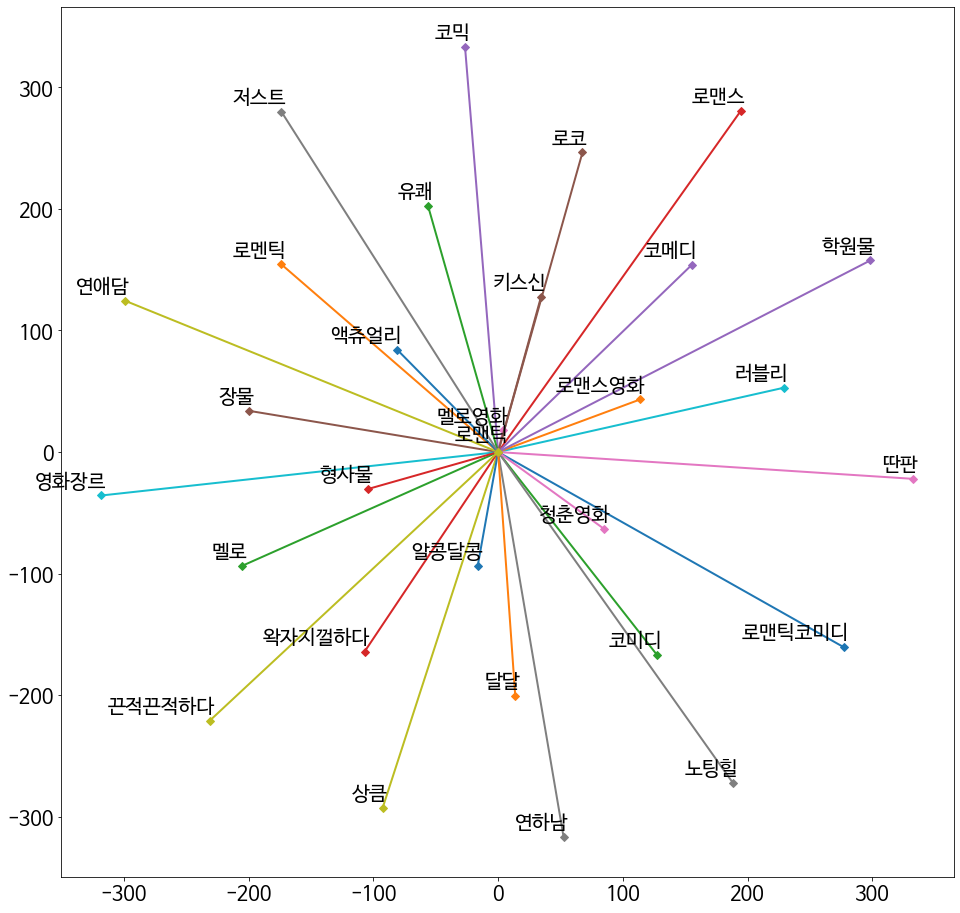

In [33]:
keyword = input("키워드 선택 : ") # 매력 #울림
w2vvisualization(keyword)
keyword = okt.morphs(keyword, stem=True)
ThirdKeyword = keyword[0]